# Problem 3 a

In [7]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics
from sklearn import preprocessing
import random
import math

%matplotlib inline

# read data into a DataFrame
data = pd.read_csv('blogData_train.csv',header=None,index_col=False) 
data= np.array(data)
random.shuffle(data)
Xd = data[:,0:280]
yd = data[:,280]
N = len(yd)

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(Xd)
Xd = min_max_scaler.transform(Xd)



In [59]:


def myBLB(Xarray,yarray,subset_size,subset_number,inner_iteration):
    b=subset_size
    s=subset_number
    r=inner_iteration

    Q_Error=[]
    B=[]
    B_best=[]
    sig=[]
    index=0
    Error_sum=0
    for i in range(s):
#        x行范围b*i-（b+1）*i， 随机取n次
        if((index+b)>N):
            index=(index+b) % N
        Error_rB=0        
        for j in range(r):
            q=0
            X_sub=[]
            y_sub=[]
#iteration  
            Error_min=100000000000
            B_Best_oner=np.zeros(280)

            for k in range(N):
                p=random.randint(index,index+b)
                X_sub.append(Xarray[p])
                y_sub.append(yarray[p])

            X_sub=np.array(X_sub)
            y_sub=np.array(y_sub)
            Btemp=np.dot(np.dot(np.linalg.pinv(np.dot(X_sub.T,X_sub)),X_sub.T),y_sub.T)
            
            B.append(Btemp)
            Error_oneB=0
            
            for ii in range(280):
                Error_oneB= Error_oneB + abs(Btemp[ii]-B_true[ii])
            if(Error_oneB<Error_min):
                B_Best_oner=Btemp
                Error_min=Error_oneB
            Error_rB=Error_rB+Error_oneB
            
        Error_sum=Error_sum + Error_rB
        
        Q_Error.append(Error_sum/(i+1))
        
        B_best.append(B_Best_oner)
        B_pred=np.mean(B_best,axis=0)
        
        index=index+b

    return Q_Error,B,B_pred



# Problem 3 b

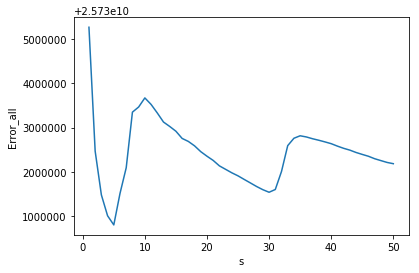

In [61]:
# compute the true B by the whole train data
lm = linear_model.LinearRegression(fit_intercept=False, normalize=False)
lm.fit(Xd,yd)
B_true=lm.coef_

#b=N**0.7,s=50,r=100
b=int(math.pow(N,0.7))

Error_all,B_all,B_estimate = myBLB(Xd,yd,b,50,100)

s=np.arange(1,51)
plt.plot(s, Error_all)

plt.xlabel('s')
plt.ylabel('Error_all')
plt.show()

It seems that the S is converge when it is bigger than 50

# Problem 3 c

the confidence intervals of the top 5 coefficients are: [[-3505.85570624  5242.51876386]
 [-3476.33602686  5179.36745326]
 [-5853.34591992  8068.23997172]
 [-5372.81711171  6728.82169706]
 [-5728.28711839  6663.35971745]]
the corresponding true estimates coefficents are [18642644.241936244, -18932066.581074864, 43.598491437733173, -50.793638187460601, 21.319248482002877]


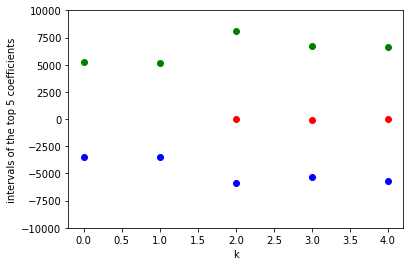

In [99]:
from scipy import stats
#sort the B_pred, find the top 5 coefficients
B_sort=sorted(enumerate(B_estimate), key=lambda x:x[1],reverse = True)
B_all=np.array(B_all)

index=[]
B_top=[]
mean_B_top=[]
SE_B_top=[]
B_ture_top=[]
B_all=np.array(B_all)
intervals_B_top=[]

for i in range(5):
    index.append(B_sort[i][0])

    B_top.append(B_all[:,index[i]])
    B_ture_top.append(B_true[index[i]])
    
B_top=np.array(B_top)
for i in range(5):
    mean_B_top.append(np.mean(B_top[i,:]))
    SE_B_top.append(np.std(B_top[i])) #standard B1
#95 confidence interval:
    intervals_B_top.append(stats.norm.interval(0.95,loc=mean_B_top[i],scale= SE_B_top[i]))
#    print(intervals_B_top[i])
intervals_B_top=np.array(intervals_B_top)
k=np.arange(5)

print('the confidence intervals of the top 5 coefficients are:',intervals_B_top)
print('the corresponding true estimates coefficents are',B_ture_top)

axes = plt.gca()
axes.set_ylim([-10000,10000])
plt.plot(k, intervals_B_top[:,0],'bo',label = 'the up estimate')
plt.plot(k, intervals_B_top[:,1],'go',label = 'the down estimate')
plt.plot(k, B_ture_top,'ro',label = 'the true estimate')
plt.xlabel('k')
plt.ylabel('intervals of the top 5 coefficients')
plt.show()


There are only 3 out of 5 "true estimates" coefficients is in the coefficience intervals. 